In [1]:
# i imported the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.style.use('seaborn-v0_8')
%matplotlib inline


In [2]:
beneficiary = pd.read_csv('../Data/Train/Train_Beneficiarydata-1542865627584.csv')
inpatient = pd.read_csv('../Data/Train/Train_Inpatientdata-1542865627584.csv')
outpatient = pd.read_csv('../Data/Train/Train_Outpatientdata-1542865627584.csv')
labels = pd.read_csv('../Data/Train/Train-1542865627584.csv')

print("All datasets loaded successfully!")
print(f"Beneficiary: {beneficiary.shape}")
print(f"Inpatient: {inpatient.shape}")
print(f"Outpatient: {outpatient.shape}")
print(f"Labels: {labels.shape}")

All datasets loaded successfully!
Beneficiary: (138556, 25)
Inpatient: (40474, 30)
Outpatient: (517737, 27)
Labels: (5410, 2)


Fraud vs Non-Fraud Providers:
PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64
Percentage:
PotentialFraud
No     90.64695
Yes     9.35305
Name: proportion, dtype: float64


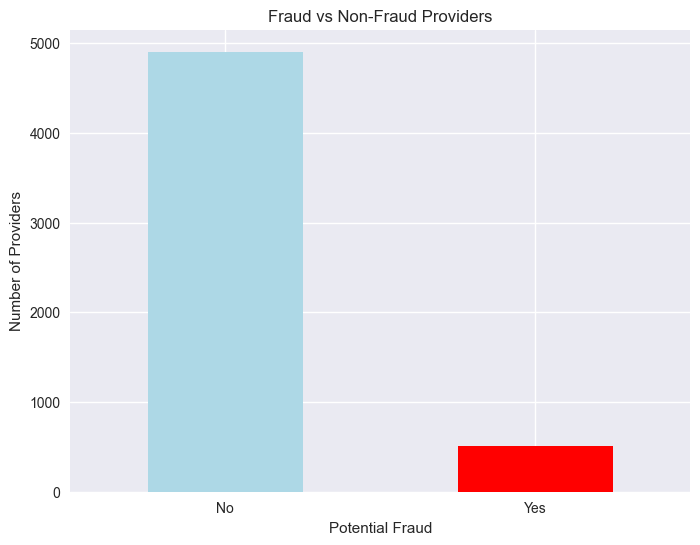

In [3]:
# Check the target variable distribution
print("Fraud vs Non-Fraud Providers:")
print(labels['PotentialFraud'].value_counts())
print("Percentage:")
print(labels['PotentialFraud'].value_counts(normalize=True) * 100)

# Visualize the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
labels['PotentialFraud'].value_counts().plot(kind='bar', color=['lightblue', 'red'])
plt.title('Fraud vs Non-Fraud Providers')
plt.xlabel('Potential Fraud')
plt.ylabel('Number of Providers')
plt.xticks(rotation=0)
plt.show()

In [4]:
print(" Dataset Structures:")

print(f"\nBeneficiary: {beneficiary.shape}")
print("Columns:", beneficiary.columns.tolist())

print(f"\nInpatient: {inpatient.shape}")
print("Columns:", inpatient.columns.tolist())

print(f"\nOutpatient: {outpatient.shape}")
print("Columns:", outpatient.columns.tolist())

print(f"\nLabels: {labels.shape}")
print("Columns:", labels.columns.tolist())

 Dataset Structures:

Beneficiary: (138556, 25)
Columns: ['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']

Inpatient: (40474, 30)
Columns: ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosis

In [6]:
print("Missing Values:")

print(f"\nBeneficiary - Missing values:")
print(beneficiary.isnull().sum().sum(), "total missing values")

print(f"\nInpatient - Missing values:")
print(inpatient.isnull().sum().sum(), "total missing values")

print(f"\nOutpatient - Missing values:")
print(outpatient.isnull().sum().sum(), "total missing values")

Missing Values:

Beneficiary - Missing values:
137135 total missing values

Inpatient - Missing values:
344003 total missing values

Outpatient - Missing values:
8093719 total missing values


In [7]:
print("Looking for common columns to join tables:")

print("\nCommon columns between Beneficiary and Inpatient:")
common_bi = set(beneficiary.columns) & set(inpatient.columns)
print(common_bi)

print("\nCommon columns between Beneficiary and Outpatient:")
common_bo = set(beneficiary.columns) & set(outpatient.columns)
print(common_bo)

print("\nCommon columns between Claims and Labels:")
common_cl = set(inpatient.columns) & set(labels.columns)
print(common_cl)

Looking for common columns to join tables:

Common columns between Beneficiary and Inpatient:
{'BeneID'}

Common columns between Beneficiary and Outpatient:
{'BeneID'}

Common columns between Claims and Labels:
{'Provider'}


In [9]:
print("Detailed Missing Values Analysis:")

print("\n Beneficiary - Top missing columns:")
beneficiary_missing = beneficiary.isnull().sum().sort_values(ascending=False)
print(beneficiary_missing[beneficiary_missing > 0])

print("\n Inpatient - Top missing columns:")
inpatient_missing = inpatient.isnull().sum().sort_values(ascending=False)
print(inpatient_missing[inpatient_missing > 0].head(10))

print("\n Outpatient - Top missing columns:")
outpatient_missing = outpatient.isnull().sum().sort_values(ascending=False)
print(outpatient_missing[outpatient_missing > 0].head(10))

Detailed Missing Values Analysis:

 Beneficiary - Top missing columns:
DOD    137135
dtype: int64

 Inpatient - Top missing columns:
ClmProcedureCode_6     40474
ClmProcedureCode_5     40465
ClmProcedureCode_4     40358
ClmProcedureCode_3     39509
ClmDiagnosisCode_10    36547
OtherPhysician         35784
ClmProcedureCode_2     35020
ClmProcedureCode_1     17326
OperatingPhysician     16644
ClmDiagnosisCode_9     13497
dtype: int64

 Outpatient - Top missing columns:
ClmProcedureCode_5     517737
ClmProcedureCode_6     517737
ClmProcedureCode_4     517735
ClmProcedureCode_3     517733
ClmProcedureCode_2     517701
ClmProcedureCode_1     517575
ClmDiagnosisCode_10    516654
ClmDiagnosisCode_9     502899
ClmDiagnosisCode_8     494825
ClmDiagnosisCode_7     484776
dtype: int64


In [10]:
print("Sample Data from Each Table:")

print("\nBeneficiary - Sample:")
display(beneficiary[['BeneID', 'Gender', 'State', 'ChronicCond_Diabetes']].head(3))

print("\nInpatient - Sample:")
display(inpatient[['BeneID', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician']].head(3))

print("\nOutpatient - Sample:")
display(outpatient[['BeneID', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician']].head(3))

print("\nLabels - Sample:")
display(labels.head(3))

Sample Data from Each Table:

Beneficiary - Sample:


,BeneID,Gender,State,ChronicCond_Diabetes
0,BENE11001,1,39,1
1,BENE11002,2,39,2
2,BENE11003,1,52,2



Inpatient - Sample:


,BeneID,Provider,InscClaimAmtReimbursed,AttendingPhysician
0,BENE11001,PRV55912,26000,PHY390922
1,BENE11001,PRV55907,5000,PHY318495
2,BENE11001,PRV56046,5000,PHY372395



Outpatient - Sample:


,BeneID,Provider,InscClaimAmtReimbursed,AttendingPhysician
0,BENE11002,PRV56011,30,PHY326117
1,BENE11003,PRV57610,80,PHY362868
2,BENE11003,PRV57595,10,PHY328821



Labels - Sample:


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No


In [11]:
print("Checking for Duplicate Records:")

print(f"Duplicate beneficiaries: {beneficiary.duplicated().sum()}")
print(f"Duplicate inpatient claims: {inpatient.duplicated().sum()}")
print(f"Duplicate outpatient claims: {outpatient.duplicated().sum()}")
print(f"Duplicate provider labels: {labels.duplicated().sum()}")

Checking for Duplicate Records:
Duplicate beneficiaries: 0
Duplicate inpatient claims: 0
Duplicate outpatient claims: 0
Duplicate provider labels: 0


In [12]:
print("Starting Feature Engineering - Provider Level Aggregation")

# 1. Combine inpatient and outpatient claims
inpatient['ClaimType'] = 'Inpatient'
outpatient['ClaimType'] = 'Outpatient'

# Combine all claims
all_claims = pd.concat([inpatient, outpatient], ignore_index=True)
print(f"Total claims: {len(all_claims)}")

# 2. Aggregate financial metrics by provider
provider_financials = all_claims.groupby('Provider').agg({
    'InscClaimAmtReimbursed': ['sum', 'mean', 'std', 'count'],
    'DeductibleAmtPaid': ['sum', 'mean']
}).round(2)

# Flatten column names
provider_financials.columns = ['_'.join(col).strip() for col in provider_financials.columns.values]
provider_financials = provider_financials.reset_index()
print(f"Provider financials shape: {provider_financials.shape}")

# 3. Aggregate by provider and claim type
provider_claim_types = all_claims.groupby(['Provider', 'ClaimType']).size().unstack(fill_value=0)
provider_claim_types = provider_claim_types.reset_index()
print(f"Provider claim types shape: {provider_claim_types.shape}")

# 4. Count unique physicians per provider
physician_counts = all_claims.groupby('Provider').agg({
    'AttendingPhysician': 'nunique',
    'OperatingPhysician': 'nunique', 
    'OtherPhysician': 'nunique'
}).reset_index()
physician_counts.columns = ['Provider', 'UniqueAttendingPhysicians', 'UniqueOperatingPhysicians', 'UniqueOtherPhysicians']
print(f"Physician counts shape: {physician_counts.shape}")

# 5. Merge everything with fraud labels
provider_features = labels.merge(provider_financials, on='Provider', how='left')
provider_features = provider_features.merge(provider_claim_types, on='Provider', how='left')
provider_features = provider_features.merge(physician_counts, on='Provider', how='left')

print(f"Final provider features shape: {provider_features.shape}")
print("\nFirst 3 rows of provider features:")
display(provider_features.head(3))

Starting Feature Engineering - Provider Level Aggregation
Total claims: 558211
Provider financials shape: (5410, 7)
Provider claim types shape: (5410, 3)
Physician counts shape: (5410, 4)
Final provider features shape: (5410, 13)

First 3 rows of provider features:


,Provider,PotentialFraud,InscClaimAmtReimbursed_sum,InscClaimAmtReimbursed_mean,InscClaimAmtReimbursed_std,InscClaimAmtReimbursed_count,DeductibleAmtPaid_sum,DeductibleAmtPaid_mean,Inpatient,Outpatient,UniqueAttendingPhysicians,UniqueOperatingPhysicians,UniqueOtherPhysicians
0,PRV51001,No,104640,4185.60,10796.09,25,5340.0,213.60,5,20,14,5,8
1,PRV51003,Yes,605670,4588.41,7309.79,132,66286.0,502.17,62,70,44,7,22
2,PRV51004,No,52170,350.13,689.96,149,310.0,2.08,0,149,38,19,26


In [14]:
print(" Final Dataset Info:")
print(provider_features.info())
print(f"\nMissing values in final dataset: {provider_features.isnull().sum().sum()}")

print("\n Fraud vs Non-Fraud in final dataset:")
print(provider_features['PotentialFraud'].value_counts())

 Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Provider                      5410 non-null   object 
 1   PotentialFraud                5410 non-null   object 
 2   InscClaimAmtReimbursed_sum    5410 non-null   int64  
 3   InscClaimAmtReimbursed_mean   5410 non-null   float64
 4   InscClaimAmtReimbursed_std    5170 non-null   float64
 5   InscClaimAmtReimbursed_count  5410 non-null   int64  
 6   DeductibleAmtPaid_sum         5410 non-null   float64
 7   DeductibleAmtPaid_mean        5409 non-null   float64
 8   Inpatient                     5410 non-null   int64  
 9   Outpatient                    5410 non-null   int64  
 10  UniqueAttendingPhysicians     5410 non-null   int64  
 11  UniqueOperatingPhysicians     5410 non-null   int64  
 12  UniqueOtherPhysicians         5410 non-nu

In [15]:
print(" Comparing Fraudulent vs Legitimate Providers:")

# Convert target to binary for analysis
provider_features['FraudBinary'] = (provider_features['PotentialFraud'] == 'Yes').astype(int)

# Group by fraud status and calculate mean values
fraud_comparison = provider_features.groupby('PotentialFraud').mean(numeric_only=True).round(2)

print(" Average Values by Fraud Status:")
display(fraud_comparison.T)  # Transpose for better readability

 Comparing Fraudulent vs Legitimate Providers:
 Average Values by Fraud Status:


PotentialFraud,No,Yes
InscClaimAmtReimbursed_sum,53193.72,584350.04
InscClaimAmtReimbursed_mean,1523.78,3842.79
InscClaimAmtReimbursed_std,2119.50,6389.40
InscClaimAmtReimbursed_count,70.44,420.55
DeductibleAmtPaid_sum,3819.07,49360.22
DeductibleAmtPaid_mean,135.50,350.84
Inpatient,3.48,46.25
Outpatient,66.95,374.30
UniqueAttendingPhysicians,13.68,41.11
UniqueOperatingPhysicians,5.49,19.29


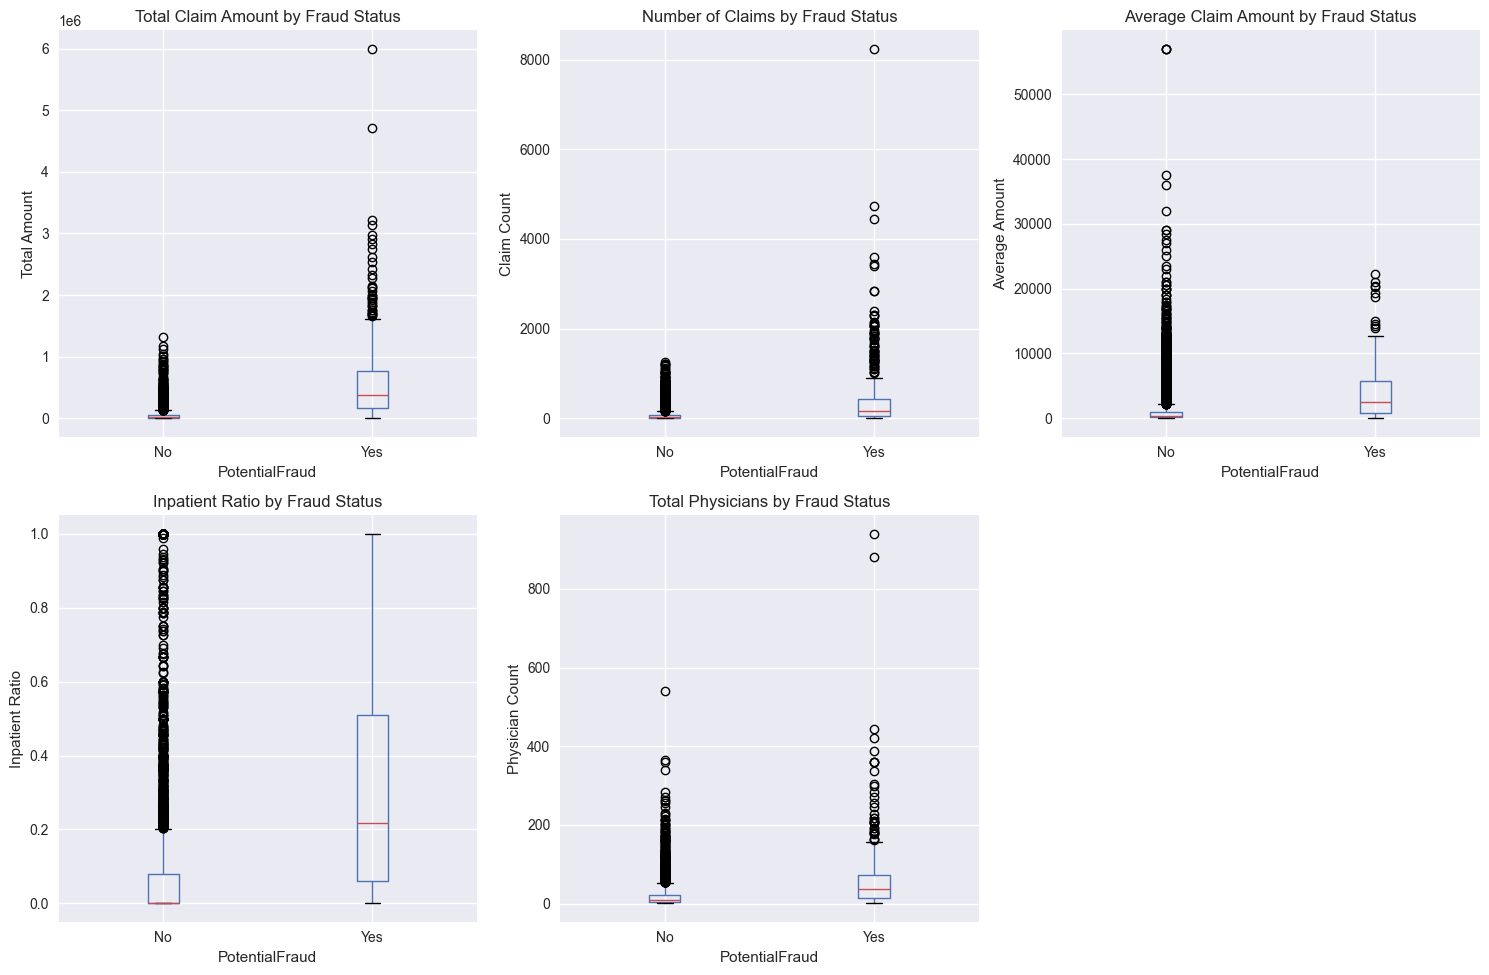

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot 1: Total Claim Amount
provider_features.boxplot(column='InscClaimAmtReimbursed_sum', by='PotentialFraud', ax=axes[0,0])
axes[0,0].set_title('Total Claim Amount by Fraud Status')
axes[0,0].set_ylabel('Total Amount')

# Plot 2: Number of Claims
provider_features.boxplot(column='InscClaimAmtReimbursed_count', by='PotentialFraud', ax=axes[0,1])
axes[0,1].set_title('Number of Claims by Fraud Status')
axes[0,1].set_ylabel('Claim Count')

# Plot 3: Average Claim Amount
provider_features.boxplot(column='InscClaimAmtReimbursed_mean', by='PotentialFraud', ax=axes[0,2])
axes[0,2].set_title('Average Claim Amount by Fraud Status')
axes[0,2].set_ylabel('Average Amount')

# Plot 4: Inpatient vs Outpatient Ratio
provider_features['Inpatient_Ratio'] = provider_features['Inpatient'] / (provider_features['Inpatient'] + provider_features['Outpatient'])
provider_features.boxplot(column='Inpatient_Ratio', by='PotentialFraud', ax=axes[1,0])
axes[1,0].set_title('Inpatient Ratio by Fraud Status')
axes[1,0].set_ylabel('Inpatient Ratio')

# Plot 5: Unique Physicians
provider_features['Total_Physicians'] = provider_features['UniqueAttendingPhysicians'] + provider_features['UniqueOperatingPhysicians']
provider_features.boxplot(column='Total_Physicians', by='PotentialFraud', ax=axes[1,1])
axes[1,1].set_title('Total Physicians by Fraud Status')
axes[1,1].set_ylabel('Physician Count')

# Hide empty subplot
axes[1,2].set_visible(False)

plt.suptitle('')  # Remove automatic title
plt.tight_layout()
plt.show()

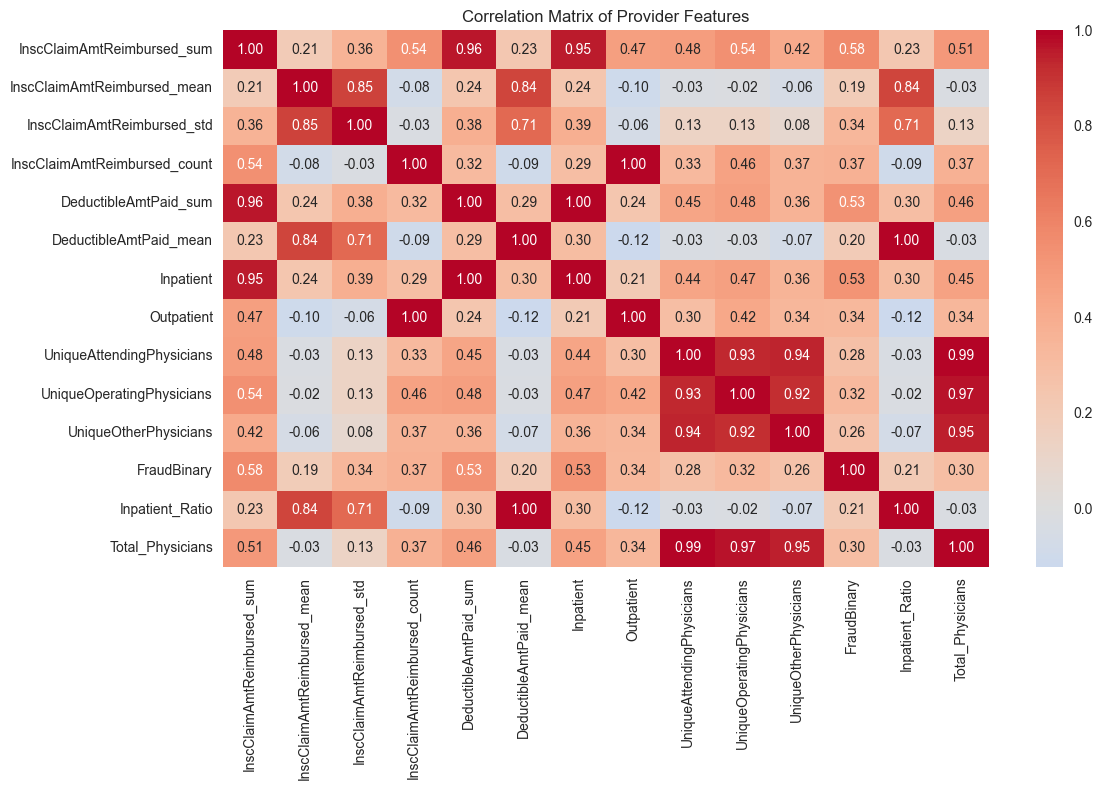

 Correlation with Fraud Target:
FraudBinary                     1.000000
InscClaimAmtReimbursed_sum      0.575558
DeductibleAmtPaid_sum           0.532070
Inpatient                       0.525393
InscClaimAmtReimbursed_count    0.374197
InscClaimAmtReimbursed_std      0.343145
Outpatient                      0.335803
UniqueOperatingPhysicians       0.324408
Total_Physicians                0.295259
UniqueAttendingPhysicians       0.276772
UniqueOtherPhysicians           0.261695
Inpatient_Ratio                 0.205683
DeductibleAmtPaid_mean          0.204616
InscClaimAmtReimbursed_mean     0.193803
Name: FraudBinary, dtype: float64


In [17]:
# Select numeric columns for correlation
numeric_cols = provider_features.select_dtypes(include=[np.number]).columns
correlation_matrix = provider_features[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Provider Features')
plt.tight_layout()
plt.show()

# Show correlation with fraud target
print(" Correlation with Fraud Target:")
fraud_correlations = correlation_matrix['FraudBinary'].sort_values(ascending=False)
print(fraud_correlations)

In [19]:
print(" Adding Beneficiary Features to Provider Analysis")

# 1. Link beneficiaries to their claims to get provider information
beneficiary_claims = all_claims[['BeneID', 'Provider']].drop_duplicates()

# 2. Merge beneficiary data with provider information
beneficiary_provider = beneficiary_claims.merge(beneficiary, on='BeneID', how='left')

# 3. Aggregate beneficiary features by provider
provider_beneficiary_features = beneficiary_provider.groupby('Provider').agg({
    'Gender': lambda x: (x == 1).mean(),  # Percentage male
    'Race': 'nunique',                    # Diversity of races
    'State': 'nunique',                   # Geographic spread
    'RenalDiseaseIndicator': lambda x: (x == 'Y').mean(),  # Chronic condition rates
    'ChronicCond_Alzheimer': 'mean',
    'ChronicCond_Heartfailure': 'mean', 
    'ChronicCond_KidneyDisease': 'mean',
    'ChronicCond_Cancer': 'mean',
    'ChronicCond_Depression': 'mean',
    'ChronicCond_Diabetes': 'mean',
    'IPAnnualReimbursementAmt': 'mean',
    'OPAnnualReimbursementAmt': 'mean'
}).round(4)

# Rename columns for clarity
provider_beneficiary_features.columns = [
    'Pct_Male', 'Unique_Races', 'Unique_States', 'Pct_RenalDisease',
    'Pct_Alzheimer', 'Pct_Heartfailure', 'Pct_KidneyDisease', 'Pct_Cancer',
    'Pct_Depression', 'Pct_Diabetes', 'Avg_IPAnnualReimbursement', 'Avg_OPAnnualReimbursement'
]

print(f"Beneficiary features shape: {provider_beneficiary_features.shape}")

 Adding Beneficiary Features to Provider Analysis
Beneficiary features shape: (5410, 12)


In [20]:
print("Step 1: Handling Missing Values and Data Preparation")

# Create cleaned version of our provider features
provider_features_clean = provider_features.copy()

# Fill missing values
provider_features_clean['InscClaimAmtReimbursed_std'] = provider_features_clean['InscClaimAmtReimbursed_std'].fillna(0)
provider_features_clean['DeductibleAmtPaid_mean'] = provider_features_clean['DeductibleAmtPaid_mean'].fillna(
    provider_features_clean['DeductibleAmtPaid_mean'].mean()
)

print(f"Missing values after cleaning: {provider_features_clean.isnull().sum().sum()}")

print("\n Step 2: Creating Additional Features")

# Create additional useful features
provider_features_clean['Amount_Per_Physician'] = (
    provider_features_clean['InscClaimAmtReimbursed_sum'] / 
    provider_features_clean['Total_Physicians']
).replace([np.inf, -np.inf], 0)

provider_features_clean['Inpatient_Outpatient_Ratio'] = (
    provider_features_clean['Inpatient'] / 
    (provider_features_clean['Outpatient'] + 1)
)

provider_features_clean['Deductible_Ratio'] = (
    provider_features_clean['DeductibleAmtPaid_sum'] / 
    (provider_features_clean['InscClaimAmtReimbursed_sum'] + 1)
)

print(" Step 3: Adding Beneficiary Features")

# Aggregate beneficiary features by provider
beneficiary_claims = all_claims[['BeneID', 'Provider']].drop_duplicates()
beneficiary_provider = beneficiary_claims.merge(beneficiary, on='BeneID', how='left')

provider_beneficiary_features = beneficiary_provider.groupby('Provider').agg({
    'Gender': lambda x: (x == 1).mean(),
    'Race': 'nunique',
    'State': 'nunique',
    'RenalDiseaseIndicator': lambda x: (x == 'Y').mean(),
    'ChronicCond_Alzheimer': 'mean',
    'ChronicCond_Heartfailure': 'mean', 
    'ChronicCond_Diabetes': 'mean'
}).round(4)

provider_beneficiary_features.columns = [
    'Pct_Male', 'Unique_Races', 'Unique_States', 'Pct_RenalDisease',
    'Pct_Alzheimer', 'Pct_Heartfailure', 'Pct_Diabetes'
]

print(" Step 4: Creating Final Feature Set")

# Merge everything
final_features = provider_features_clean.merge(
    provider_beneficiary_features, on='Provider', how='left'
)

print(f" Final dataset shape: {final_features.shape}")
print(f" Total features: {len(final_features.columns)}")
print(f" Missing values: {final_features.isnull().sum().sum()}")

Step 1: Handling Missing Values and Data Preparation
Missing values after cleaning: 0

 Step 2: Creating Additional Features
 Step 3: Adding Beneficiary Features
 Step 4: Creating Final Feature Set
 Final dataset shape: (5410, 26)
 Total features: 26
 Missing values: 0


In [21]:
import os

print(" Step 5: Saving Processed Data")

# Create the processed folder if it doesn't exist
processed_dir = '../Data/processed'
os.makedirs(processed_dir, exist_ok=True)
print(f" Created directory: {processed_dir}")

# Save the final datasets
final_features.to_csv('../Data/processed/provider_features_final.csv', index=False)
print(" Final features saved!")

# Save modeling version (without IDs and target)
modeling_features = final_features.drop(['Provider', 'PotentialFraud'], axis=1)
modeling_features.to_csv('../Data/processed/features_for_modeling.csv', index=False)
print(" Modeling features saved!")

# Also save the target labels separately
labels_to_save = final_features[['Provider', 'PotentialFraud']]
labels_to_save.to_csv('../Data/processed/provider_labels.csv', index=False)
print(" Provider labels saved!")

print("\n Step 6: Final Summary")

print(" Data Exploration & Feature Engineering COMPLETED! 🎉")
print(f"• Final dataset: {final_features.shape[0]} providers, {final_features.shape[1]} features")
print(f"• Fraud rate: {(final_features['PotentialFraud'] == 'Yes').mean():.2%}")
print(f"• Feature categories: Financial, Claim volumes, Physician networks, Patient demographics")
print("• Ready for modeling phase! ")

# Show final feature list
print(f"\n Final Features Created ({len(modeling_features.columns)} features):")
for i, col in enumerate(modeling_features.columns, 1):
    print(f"  {i:2d}. {col}")

 Step 5: Saving Processed Data
 Created directory: ../Data/processed
 Final features saved!
 Modeling features saved!
 Provider labels saved!

 Step 6: Final Summary
 Data Exploration & Feature Engineering COMPLETED! 🎉
• Final dataset: 5410 providers, 26 features
• Fraud rate: 9.35%
• Feature categories: Financial, Claim volumes, Physician networks, Patient demographics
• Ready for modeling phase! 

 Final Features Created (24 features):
   1. InscClaimAmtReimbursed_sum
   2. InscClaimAmtReimbursed_mean
   3. InscClaimAmtReimbursed_std
   4. InscClaimAmtReimbursed_count
   5. DeductibleAmtPaid_sum
   6. DeductibleAmtPaid_mean
   7. Inpatient
   8. Outpatient
   9. UniqueAttendingPhysicians
  10. UniqueOperatingPhysicians
  11. UniqueOtherPhysicians
  12. FraudBinary
  13. Inpatient_Ratio
  14. Total_Physicians
  15. Amount_Per_Physician
  16. Inpatient_Outpatient_Ratio
  17. Deductible_Ratio
  18. Pct_Male
  19. Unique_Races
  20. Unique_States
  21. Pct_RenalDisease
  22. Pct_Alzheime